<a href="https://colab.research.google.com/github/Antonio-Villarreal/Multimodal-Machine-Learning/blob/main/coding_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Assignment 3

Importing Files

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import zipfile

# specify the zip file name
zip_file = '/content/gdrive/MyDrive/coding_assignment_3.zip'

# specify the directory where you want to extract the files
extraction_path = '/content/'

# extract the files
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [3]:
main_dir = "/content/coding_assignment_3"

Imports

In [4]:
import os
import random
import shutil
import matplotlib.pyplot as plt
import numpy as np
import librosa

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from joblib import dump, load
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import numpy as np
from joblib import load
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.feature_selection import SelectKBest, f_classif

## Step 1: Split the dataset into training and testing sets

Split Data

In [5]:
emotions = ['angry', 'sad', 'happy', 'fear']
train_ratio = 0.7  # ratio of files to use for training

for emotion in emotions:
    files = os.listdir(os.path.join(main_dir, emotion))
    num_files = len(files)
    num_train = int(num_files * train_ratio)
    train_files = random.sample(files, num_train)
    test_files = list(set(files) - set(train_files))
    
    # move files to train directory
    for file in train_files:
        src_path = os.path.join(main_dir, emotion, file)
        dst_path = os.path.join(main_dir, 'train', emotion, file)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)
    
    # move files to test directory
    for file in test_files:
        src_path = os.path.join(main_dir, emotion, file)
        dst_path = os.path.join(main_dir, 'test', emotion, file)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

## Step 2: Exploratory Data Analysis

Emotion Distribution

In [6]:
# Define the directories
emotion_dirs = ["sad", "angry", "happy", "fear"]

# Loop through the emotion directories and count the number of files
print("Emotion\t\tFiles")
print("------------------------")
for emotion in emotion_dirs:
    dir_path = os.path.join(main_dir, emotion)
    file_count = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
    print(f"{emotion}\t\t{file_count}")

# Define the directories
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")
emotion_dirs = ["angry", "fear", "happy", "sad"]

# Loop through the train and test directories and count the number of files in each subdirectory
print("\nDirectory\t\tEmotion\t\tFiles")
print("---------------------------------------------")
for directory in [train_dir, test_dir]:
    for emotion in emotion_dirs:
        dir_path = os.path.join(directory, emotion)
        file_count = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
        print(f"{directory}\t\t{emotion}\t\t{file_count}")

Emotion		Files
------------------------
sad		100
angry		100
happy		100
fear		100

Directory		Emotion		Files
---------------------------------------------
/content/coding_assignment_3/train		angry		70
/content/coding_assignment_3/train		fear		70
/content/coding_assignment_3/train		happy		70
/content/coding_assignment_3/train		sad		70
/content/coding_assignment_3/test		angry		30
/content/coding_assignment_3/test		fear		30
/content/coding_assignment_3/test		happy		30
/content/coding_assignment_3/test		sad		30


Audio Duration

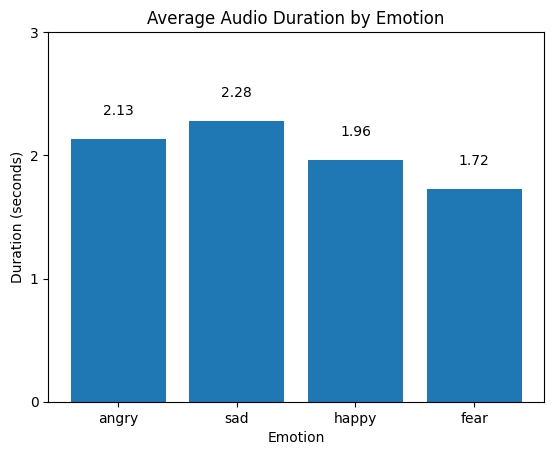

In [7]:
# Define the directory containing the audio files
emotions = ['angry', 'sad', 'happy', 'fear']
main_dir = "/content/coding_assignment_3"

# Calculate the average duration for each emotion
avg_durations = []
for emotion in emotions:
    emotion_dir = os.path.join(main_dir, emotion)
    durations = []
    for filename in os.listdir(emotion_dir):
        file_path = os.path.join(emotion_dir, filename)
        audio, sr = librosa.load(file_path, sr=None)
        duration = len(audio) / sr
        durations.append(duration)
    avg_duration = sum(durations) / len(durations)
    avg_durations.append(avg_duration)

# Plot the average durations
plt.bar(emotions, avg_durations)
plt.xlabel('Emotion')
plt.ylabel('Duration (seconds)')
plt.title('Average Audio Duration by Emotion')

# Adjust y-axis ticks
yticks = [i for i in range(0, 4)]
plt.yticks(yticks)

# Add labels to each column
for i, duration in enumerate(avg_durations):
    plt.text(i, duration + 0.2, f'{duration:.2f}', ha='center')

plt.show()

Audio Frequency

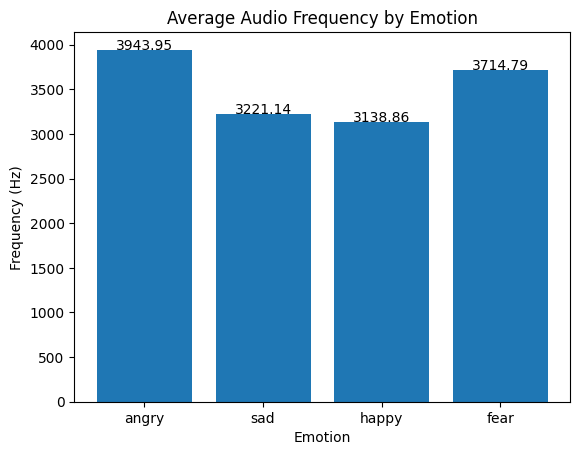

In [8]:
# Define the directory containing the audio files
emotions = ['angry', 'sad', 'happy', 'fear']

# Calculate the average frequency for each emotion
avg_frequencies = []
for emotion in emotions:
    emotion_dir = os.path.join(main_dir, emotion)
    frequencies = []
    for filename in os.listdir(emotion_dir):
        file_path = os.path.join(emotion_dir, filename)
        audio, sr = librosa.load(file_path, sr=None)
        stft = librosa.stft(audio)
        spectrum = np.abs(stft)
        mean_spectrum = np.mean(spectrum, axis=1)
        frequencies.append(librosa.fft_frequencies(sr=sr)[:len(mean_spectrum)].dot(mean_spectrum) / np.sum(mean_spectrum))
    avg_frequency = sum(frequencies) / len(frequencies)
    avg_frequencies.append(avg_frequency)

# Plot the average frequencies
plt.bar(emotions, avg_frequencies)
plt.xlabel('Emotion')
plt.ylabel('Frequency (Hz)')
plt.title('Average Audio Frequency by Emotion')

# Add labels to each column
for i, frequency in enumerate(avg_frequencies):
    plt.text(i, frequency + 0.2, f'{frequency:.2f}', ha='center')

plt.show()

Visualize Waveforms

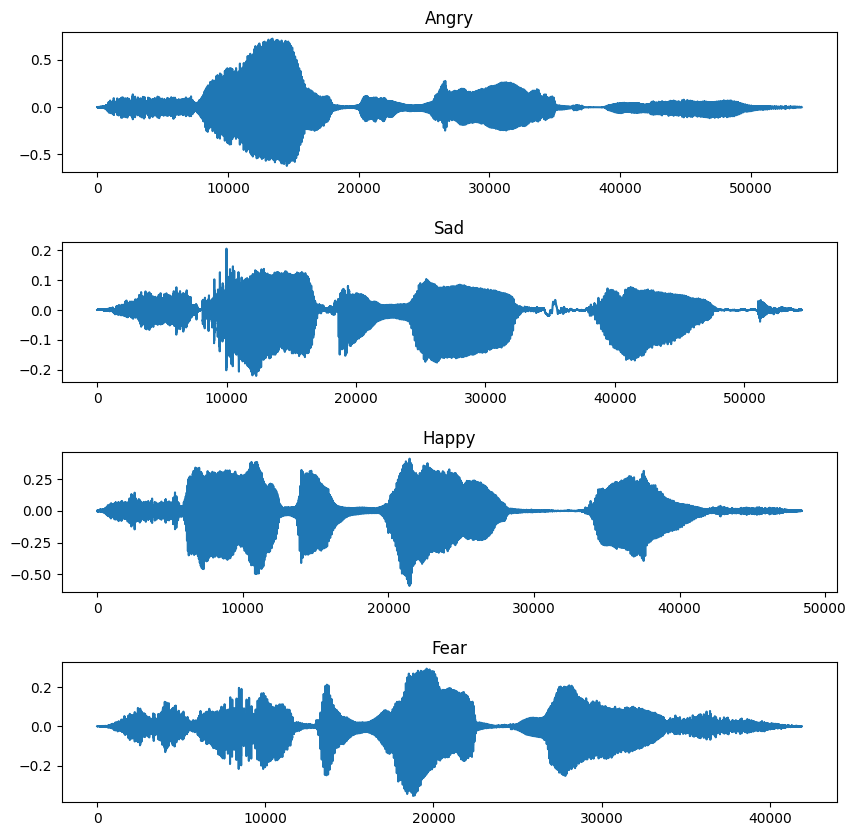

In [9]:
# Define the directory containing the audio files
emotions = ['angry', 'sad', 'happy', 'fear']

# Create a figure with four subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

# Loop through each emotion and plot a random audio signal
for i, emotion in enumerate(emotions):
    emotion_dir = os.path.join(main_dir, emotion)
    filenames = os.listdir(emotion_dir)
    filename = random.choice(filenames)
    file_path = os.path.join(emotion_dir, filename)
    audio, sr = librosa.load(file_path, sr=None)
    axs[i].set_title(emotion.capitalize())
    axs[i].plot(audio)

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)

plt.show()

## Step 3: Acoustic Feature Extraction

In [10]:
# Define constants for feature extraction
n_fft = 2048
hop_length = 512
n_mels = 128
max_feature_length = 1000

In [11]:
# Function to extract Mel spectrogram features from an audio file
def extract_melspec_features(audio_file_path):
    y, sr = librosa.load(audio_file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S.flatten()

# Function to extract features and labels from audio files
def extract_features_and_labels(directory):
    X = []
    y = []
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        class_label = class_dir.lower()
        for audio_file_path in os.listdir(class_path):
            features = extract_melspec_features(os.path.join(class_path, audio_file_path))
            if len(features) < max_feature_length:
                features = np.pad(features, ((0, max_feature_length - len(features)), (0, 0)), mode='constant')
            else:
                features = features[:max_feature_length]
            X.append(features)
            y.append(class_label)
    return np.array(X), np.array(y)

In [12]:
# Load the train and test data directories
main_dir_path = "/content/coding_assignment_3"
train_dir_path = os.path.join(main_dir_path, 'train')
test_dir_path = os.path.join(main_dir_path, 'test')

In [13]:
# Extract features and labels from the train and test directories
X_train, y_train = extract_features_and_labels(os.path.join(main_dir_path, 'train'))
X_test, y_test = extract_features_and_labels(os.path.join(main_dir_path, 'test'))

## Step 4: Feature Post-processing

In [14]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# # Use SelectKBest to select the top 100 most important features
# selector = SelectKBest(f_classif, k=100)
# X_train_scaled = selector.fit_transform(X_train_scaled, y_train)
# X_test_scaled = selector.transform(X_test_scaled)

## Step 5: Build your audio emotion recognition model

In [38]:
# Define the hyperparameter grids for each model
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'sigmoid']}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
mlp_params = {'hidden_layer_sizes': [(50,50), (100,100), (200,200)], 'activation': ['relu', 'tanh']}

In [39]:
labels = ['angry', 'fear', 'happy', 'sad']

In [40]:
# Define the classifiers with default parameters
svm = SVC(probability=True)
rf = RandomForestClassifier()
mlp = MLPClassifier()

# Define the parameter grid and perform grid search for each model
svm_grid = GridSearchCV(svm, svm_params, cv=5)
rf_grid = GridSearchCV(rf, rf_params, cv=5)
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5)

# Fit the grid search objects to the training data
svm_grid.fit(X_train_scaled, y_train)
rf_grid.fit(X_train_scaled, y_train)
mlp_grid.fit(X_train_scaled, y_train)

# Make predictions on the test data using the best models
svm_pred = svm_grid.best_estimator_.predict(X_test_scaled)
rf_pred = rf_grid.best_estimator_.predict(X_test_scaled)
mlp_pred = mlp_grid.best_estimator_.predict(X_test_scaled)

# Get probability predictions for each model
svm_pred_prob = svm_grid.best_estimator_.predict_proba(X_test_scaled)
rf_pred_prob = rf_grid.best_estimator_.predict_proba(X_test_scaled)
mlp_pred_prob = mlp_grid.best_estimator_.predict_proba(X_test_scaled)

In [41]:
# Create the models directory if it does not exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the models
dump(svm_grid.best_estimator_, 'models/svm.joblib')
dump(rf_grid.best_estimator_, 'models/random_forest.joblib')
dump(mlp_grid.best_estimator_, 'models/mlp.joblib')

['models/mlp.joblib']

In [42]:
print("SVM best hyperparameters: ", svm_grid.best_params_)
print("Random forest best hyperparameters: ", rf_grid.best_params_)
print("MLP best hyperparameters: ", mlp_grid.best_params_)

SVM best hyperparameters:  {'C': 10, 'kernel': 'rbf'}
Random forest best hyperparameters:  {'max_depth': 10, 'n_estimators': 200}
MLP best hyperparameters:  {'activation': 'relu', 'hidden_layer_sizes': (100, 100)}


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the saved models
svm_model = load('models/svm.joblib')
rf_model = load('models/random_forest.joblib')
mlp_model = load('models/mlp.joblib')

# Make predictions on the test set
svm_pred = svm_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
mlp_pred = mlp_model.predict(X_test_scaled)

# Evaluate performance on the test set
svm_acc = accuracy_score(y_test, svm_pred)
svm_prec = precision_score(y_test, svm_pred, average='weighted')
svm_rec = recall_score(y_test, svm_pred, average='weighted')

rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='weighted')
rf_rec = recall_score(y_test, rf_pred, average='weighted')

mlp_acc = accuracy_score(y_test, mlp_pred)
mlp_prec = precision_score(y_test, mlp_pred, average='weighted')
mlp_rec = recall_score(y_test, mlp_pred, average='weighted')

# Print the model summary
print("SVM accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}".format(svm_acc, svm_prec, svm_rec))
print("Random Forest accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}".format(rf_acc, rf_prec, rf_rec))
print("MLP accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}".format(mlp_acc, mlp_prec, mlp_rec))

SVM accuracy: 0.950, precision: 0.951, recall: 0.950
Random Forest accuracy: 0.908, precision: 0.916, recall: 0.908
MLP accuracy: 0.933, precision: 0.933, recall: 0.933


## Step 6: Model evaluation

Loss

In [20]:
# Calculate loss for each model
svm_loss = log_loss(y_test, svm_pred_prob, labels=labels)
rf_loss = log_loss(y_test, rf_pred_prob, labels=labels)
mlp_loss = log_loss(y_test, mlp_pred_prob, labels=labels)

print("SVM Loss:", svm_loss)
print("RF Loss:", rf_loss)
print("MLP Loss:", mlp_loss)

SVM Loss: 0.1945042283862511
RF Loss: 0.5261288450552797
MLP Loss: 0.2916395353689307


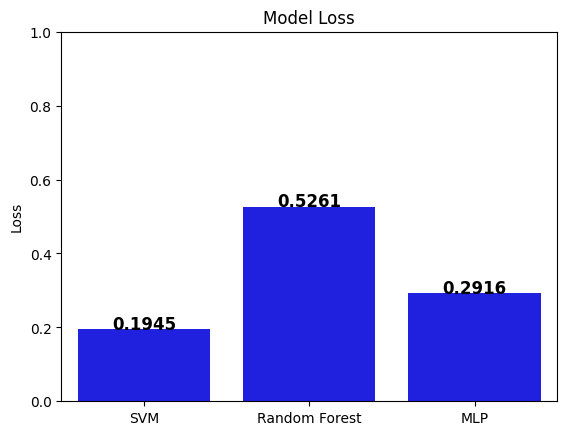

In [21]:
# Define data
model_names = ["SVM", "Random Forest", "MLP"]
accuracies = [svm_loss, rf_loss, mlp_loss]

# Plot bar chart
sns.barplot(x=model_names, y=accuracies, color="blue")
plt.ylim(0.0, 1.0)
plt.ylabel("Loss")
plt.title("Model Loss")

# Add labels to bars
for i, v in enumerate(accuracies):
    plt.text(i, v, f"{v:.4f}", horizontalalignment='center', fontweight='bold', fontsize=12)

plt.show()

Accuracy

In [22]:
y_true = y_test

# Accuracy for each model
svm_acc = accuracy_score(y_true, svm_pred)
rf_acc = accuracy_score(y_true, rf_pred)
mlp_acc = accuracy_score(y_true, mlp_pred)

print("Accuracies:")
print("SVM: ", svm_acc)
print("Random Forest: ", rf_acc)
print("MLP: ", mlp_acc)

Accuracies:
SVM:  0.95
Random Forest:  0.9166666666666666
MLP:  0.9416666666666667


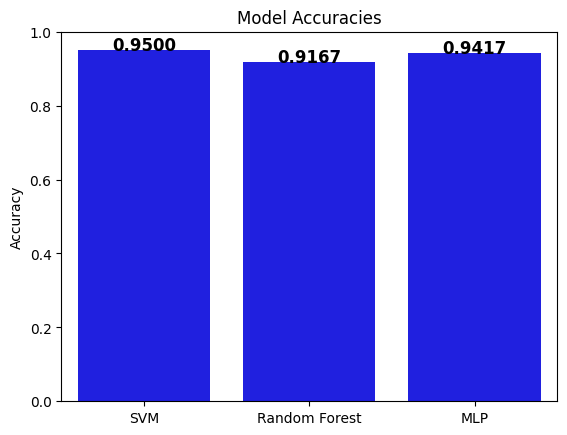

In [23]:
# Define data
model_names = ["SVM", "Random Forest", "MLP"]
accuracies = [svm_acc, rf_acc, mlp_acc]

# Plot bar chart
sns.barplot(x=model_names, y=accuracies, color="blue")
plt.ylim(0.0, 1.0)
plt.ylabel("Accuracy")
plt.title("Model Accuracies")

# Add labels to bars
for i, v in enumerate(accuracies):
    plt.text(i, v, f"{v:.4f}", horizontalalignment='center', fontweight='bold', fontsize=12)

plt.show()

Precision

In [24]:
# Precision for each model
svm_precision = precision_score(y_true, svm_pred, average='weighted')
rf_precision = precision_score(y_true, rf_pred, average='weighted')
mlp_precision = precision_score(y_true, mlp_pred, average='weighted')

print("Precisions:")
print("SVM: ", svm_precision)
print("Random Forest: ", rf_precision)
print("MLP: ", mlp_precision)

Precisions:
SVM:  0.9506967066581917
Random Forest:  0.9209921798631476
MLP:  0.9476005085015096


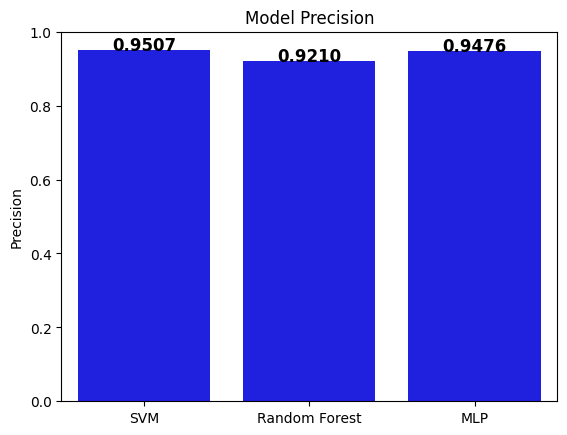

In [25]:
# Define data
model_names = ["SVM", "Random Forest", "MLP"]
accuracies = [svm_precision, rf_precision, mlp_precision]

# Plot bar chart
sns.barplot(x=model_names, y=accuracies, color="blue")
plt.ylim(0.0, 1.0)
plt.ylabel("Precision")
plt.title("Model Precision")

# Add labels to bars
for i, v in enumerate(accuracies):
    plt.text(i, v, f"{v:.4f}", horizontalalignment='center', fontweight='bold', fontsize=12)

plt.show()

F1-Score

In [26]:
# F1-score for each model
svm_f1 = f1_score(y_true, svm_pred, average='weighted')
rf_f1 = f1_score(y_true, rf_pred, average='weighted')
mlp_f1 = f1_score(y_true, mlp_pred, average='weighted')

print("F1-scores:")
print("SVM: ", svm_f1)
print("Random Forest: ", rf_f1)
print("MLP: ", mlp_f1)

F1-scores:
SVM:  0.9496871581866302
Random Forest:  0.9170699973978664
MLP:  0.9412317329794407


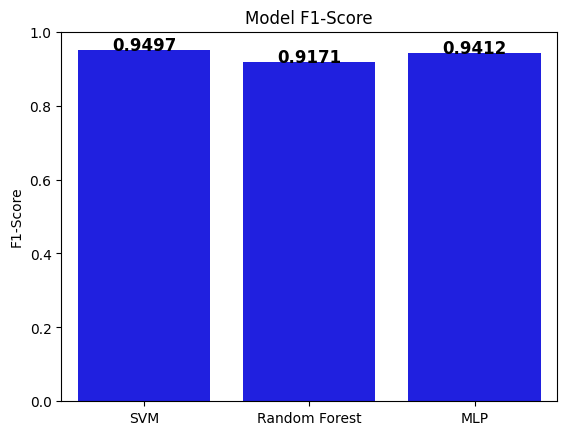

In [27]:
# Define data
model_names = ["SVM", "Random Forest", "MLP"]
accuracies = [svm_f1, rf_f1, mlp_f1]

# Plot bar chart
sns.barplot(x=model_names, y=accuracies, color="blue")
plt.ylim(0.0, 1.0)
plt.ylabel("F1-Score")
plt.title("Model F1-Score")

# Add labels to bars
for i, v in enumerate(accuracies):
    plt.text(i, v, f"{v:.4f}", horizontalalignment='center', fontweight='bold', fontsize=12)

plt.show()

Confusion Matrix

In [28]:
# Calculate confusion matrices for each model
svm_cm = confusion_matrix(y_test, svm_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
mlp_cm = confusion_matrix(y_test, mlp_pred)

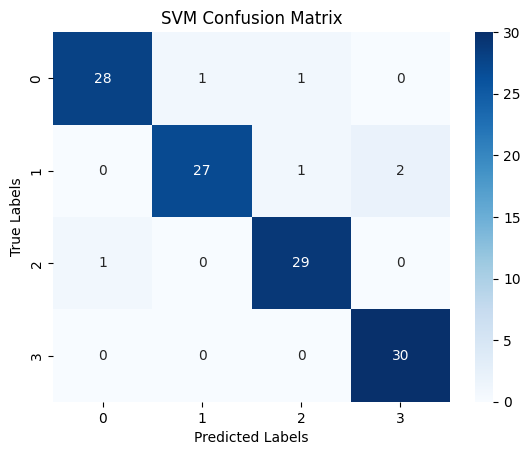

In [29]:
# Plot SVM confusion matrix
sns.heatmap(svm_cm, annot=True, cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

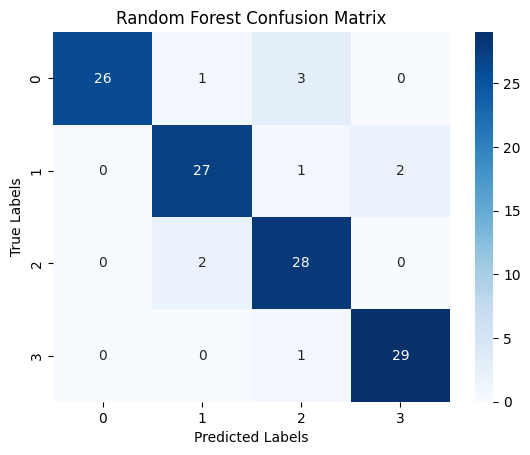

In [30]:
# Plot Random Forest confusion matrix
sns.heatmap(rf_cm, annot=True, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

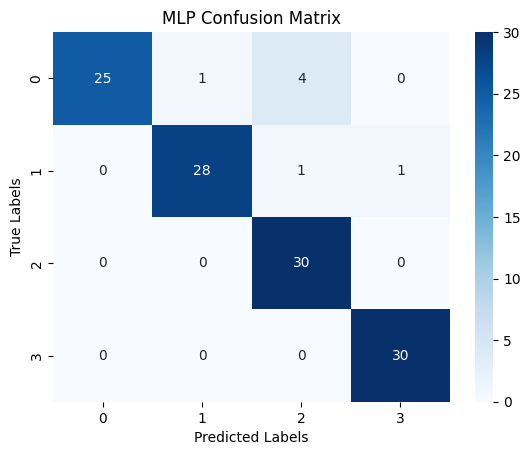

In [31]:
# Plot MLP confusion matrix
sns.heatmap(mlp_cm, annot=True, cmap="Blues")
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Predictions

In [32]:
# Define constants for feature extraction
n_fft = 2048
hop_length = 512
n_mels = 128
max_feature_length = 1000

# Load the saved models
svm = load('models/svm.joblib')
rf = load('models/random_forest.joblib')
mlp = load('models/mlp.joblib')

In [33]:
# Function to extract Mel spectrogram features from an audio file
def extract_melspec_features(audio_file_path):
    y, sr = librosa.load(audio_file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S.flatten()

# Function to predict the emotion of an audio file using the trained models
def predict_emotion(audio_file_path):
    features = extract_melspec_features(audio_file_path)
    if len(features) < max_feature_length:
        features = np.pad(features, ((0, max_feature_length - len(features)), (0, 0)), mode='constant')
    else:
        features = features[:max_feature_length]
    features_scaled = scaler.transform([features])
    svm_prediction = svm.predict(features_scaled)[0]
    rf_prediction = rf.predict(features_scaled)[0]
    mlp_prediction = mlp.predict(features_scaled)[0]
    return svm_prediction, rf_prediction, mlp_prediction

In [34]:
# Get a random audio file path from the subdirectories
root_dir = 'coding_assignment_3'
emotions = ['angry', 'fear', 'happy', 'sad']
random_emotion = random.choice(emotions)
audio_file = random.choice(os.listdir(os.path.join(root_dir, random_emotion)))
audio_file_path = os.path.join(root_dir, random_emotion, audio_file)

# Extract the expected emotion from the file path
expected_emotion = random_emotion

svm_prediction, rf_prediction, mlp_prediction = predict_emotion(audio_file_path)

print(f'Expected emotion: {expected_emotion}')
print(f'Path: {audio_file_path}')
print('--------------------------------------')
print(f'SVM predicted emotion: {svm_prediction}')
print(f'Random Forest predicted emotion: {rf_prediction}')
print(f'MLP predicted emotion: {mlp_prediction}')

Expected emotion: happy
Path: coding_assignment_3/happy/YAF_sour_happy.wav
--------------------------------------
SVM predicted emotion: happy
Random Forest predicted emotion: happy
MLP predicted emotion: happy


In [35]:
root_dir = 'coding_assignment_3'
emotions = ['angry', 'fear', 'happy', 'sad']

# Create a list of all audio file paths in the subdirectories
audio_file_paths = []
for emotion in emotions:
    audio_file_paths += [os.path.join(root_dir, emotion, audio_file) for audio_file in os.listdir(os.path.join(root_dir, emotion))]
random.shuffle(audio_file_paths)

# Create a dictionary to store the number of times expected and predicted emotions do not match for each model
incorrect_predictions = defaultdict(lambda: 0)

# Run the loop for each audio file path
for i, audio_file_path in enumerate(audio_file_paths):
    expected_emotion = os.path.basename(os.path.dirname(audio_file_path))

    svm_prediction, rf_prediction, mlp_prediction = predict_emotion(audio_file_path)
    
    # Check if the expected emotion matches the predicted emotion for each model
    if svm_prediction != expected_emotion or rf_prediction != expected_emotion or mlp_prediction != expected_emotion:
        print(f'Loop index: {i}')
        print(f'Audio file path: {audio_file_path}')
        print(f'Expected emotion: {expected_emotion}')
        if svm_prediction != expected_emotion:
            incorrect_predictions['SVM'] += 1
            print(f'SVM predicted emotion: {svm_prediction}')
        if rf_prediction != expected_emotion:
            incorrect_predictions['Random Forest'] += 1
            print(f'Random Forest predicted emotion: {rf_prediction}')
        if mlp_prediction != expected_emotion:
            incorrect_predictions['MLP'] += 1
            print(f'MLP predicted emotion: {mlp_prediction}')
        print('\n')

Loop index: 17
Audio file path: coding_assignment_3/fear/YAF_mouse_fear.wav
Expected emotion: fear
SVM predicted emotion: sad
Random Forest predicted emotion: sad


Loop index: 23
Audio file path: coding_assignment_3/angry/YAF_puff_angry.wav
Expected emotion: angry
MLP predicted emotion: happy


Loop index: 28
Audio file path: coding_assignment_3/happy/YAF_page_happy.wav
Expected emotion: happy
Random Forest predicted emotion: fear


Loop index: 50
Audio file path: coding_assignment_3/angry/YAF_mill_angry.wav
Expected emotion: angry
Random Forest predicted emotion: happy


Loop index: 82
Audio file path: coding_assignment_3/angry/YAF_met_angry.wav
Expected emotion: angry
SVM predicted emotion: fear
Random Forest predicted emotion: fear
MLP predicted emotion: fear


Loop index: 152
Audio file path: coding_assignment_3/angry/YAF_witch_angry.wav
Expected emotion: angry
Random Forest predicted emotion: happy
MLP predicted emotion: happy


Loop index: 154
Audio file path: coding_assignment_

In [36]:
# Calculate the accuracy for each model
svm_accuracy = 1 - (incorrect_predictions['SVM'] / len(audio_file_paths))
rf_accuracy = 1 - (incorrect_predictions['Random Forest'] / len(audio_file_paths))
mlp_accuracy = 1 - (incorrect_predictions['MLP'] / len(audio_file_paths))

print(f'SVM accuracy: {svm_accuracy}')
print(f'Random Forest accuracy: {rf_accuracy}')
print(f'MLP accuracy: {mlp_accuracy}')

SVM accuracy: 0.985
Random Forest accuracy: 0.975
MLP accuracy: 0.9825
